In [ ]:
!pip install scikit-learn==1.0.2
!pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.1/480.1 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 KB 5.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from pycaret.datasets import get_data
from pycaret.time_series import TSForecastingExperiment


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel('/content/AAQ-AQI-interpolated.xlsx','Adilabad')

In [ ]:
df_h=pd.read_excel('/content/Heat Wave Dataset Cleaned.xlsx','Adilabad')

In [ ]:
df_h

,District,Date,Max Temp (°C),Rain (mm),Min Temp (°C),Min Humidity (%),Max Humidity (%),Min Wind Speed (Kmph),Max Wind Speed (Kmph)
0,Adilabad,2018-01-01,33.5,0.0,16.8,41.8,88.1,2.0,19.7
1,Adilabad,2018-01-02,33.2,0.0,16.9,38.8,85.0,3.0,17.6
2,Adilabad,2018-01-03,32.7,0.0,14.7,41.6,85.1,1.2,18.8
3,Adilabad,2018-01-04,32.2,0.0,14.9,42.1,86.8,0.8,16.4
4,Adilabad,2018-01-05,32.4,0.0,14.3,40.9,86.5,0.0,19.2
...,...,...,...,...,...,...,...,...,...
1728,Adilabad,2022-09-26,36.4,0.0,24.7,76.9,100.0,0.0,44.1
1729,Adilabad,2022-09-27,34.8,41.0,26.7,83.7,99.9,0.0,17.0
1730,Adilabad,2022-09-28,37.0,10.3,24.3,82.6,100.0,0.2,12.0
1731,Adilabad,2022-09-29,36.3,33.5,25.0,85.4,100.0,0.0,23.0


In [ ]:
df_target=df[['DATE','AQI']]

In [ ]:
df_h_target=df_h[['Date','Max Temp (°C)']]

In [ ]:
df_h_target

,Date,Max Temp (°C)
0,2018-01-01,33.5
1,2018-01-02,33.2
2,2018-01-03,32.7
3,2018-01-04,32.2
4,2018-01-05,32.4
...,...,...
1728,2022-09-26,36.4
1729,2022-09-27,34.8
1730,2022-09-28,37.0
1731,2022-09-29,36.3


In [ ]:
df_target['DATE'] = pd.to_datetime(df_target['DATE'])
df_target = df_target.sort_values('DATE')

In [ ]:
df_h_target['Date'] = pd.to_datetime(df_h_target['Date'])
df_h_target = df_h_target.sort_values('Date')

In [ ]:
train_df = df_target.iloc[:74]
test_df = df_target.iloc[74:]

In [ ]:
train_df

,DATE,AQI
0,2016-01-01,67.333333
1,2016-02-01,68.333333
2,2016-03-01,71.111111
3,2016-04-01,69.555556
4,2016-05-01,70.555556
...,...,...
69,2021-10-01,61.500000
70,2021-11-01,60.400000
71,2021-12-01,59.300000
72,2022-01-01,58.200000


In [ ]:
df_py=df_h_target.copy()
df_py.set_index('Date',inplace=True)

In [ ]:
df_py.reset_index(inplace=True)

In [ ]:
df_py.rename(columns={'Date':'ds'},inplace=True)

In [ ]:
df_py['ds'] = pd.to_datetime(df_py['ds'])

In [ ]:
eda = TSForecastingExperiment()
eda.setup(data=df_py,target='Max Temp (°C)',fh=80)

,Description,Value
0,session_id,5832
1,Target,Max Temp (°C)
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(1733, 2)"
5,Transformed data shape,"(1733, 2)"
6,Transformed train set shape,"(1653, 2)"
7,Transformed test set shape,"(80, 2)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
eda.compare_models(sort='rmse')


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
naive,Naive Forecaster,2.0455,1.7598,3.2337,4.0068,0.0862,0.0867,-0.4971,2.3833
snaive,Seasonal Naive Forecaster,2.1186,1.9095,3.3487,4.3454,0.0923,0.0895,-0.6878,0.0433
grand_means,Grand Means Forecaster,2.9313,2.3672,4.6339,5.3881,0.1243,0.1260,-1.7981,0.0467
croston,Croston,2.9879,2.5117,4.7383,5.7295,0.1294,0.1315,-2.8242,0.0333


Processing:   0%|          | 0/101 [00:00<?, ?it/s]

NaiveForecaster()

In [ ]:
tuned_model = eda.tune_model(model)

NameError: ignored

In [ ]:
eda.predict_model(tuned_model)

In [ ]:
final_model =eda.finalize_model(tuned_model)
# Future Predictions
y_pred_future = eda.predict_model(final_model, verbose=False)

In [ ]:
y_pred_future

In [ ]:
from sktime.utils.plotting import plot_series


In [ ]:
df_py

In [ ]:
y_pred_future

In [ ]:
y_pred

In [ ]:
# Test Set Predictions
y_pred =eda.predict_model(tuned_model)

# Finalize Model
final_model = eda.finalize_model(tuned_model)

# Future Predictions
y_pred_future = eda.predict_model(final_model, verbose=False)

# Plot Results
y_train = eda.get_config("y_train")
_ = plot_series(df_py, y_train, y_pred, y_pred_future, labels=['All', 'Train', 'Test Predictions', 'Future Pred (Unknown)'])
plt.grid()

In [ ]:
!pip install pystan

In [ ]:
!pip install prophet

import prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df =df_h_target.rename(columns={'Date': 'ds',
                        'Max Temp (°C)': 'y'})

In [ ]:
df

In [ ]:
from prophet import Prophet

In [ ]:
split_date = '2021-12-31'
train = df.loc[df.ds <= split_date].copy()
test = df.loc[df.ds > split_date].copy()

In [ ]:
train

,ds,y
0,2018-01-01,33.5
1,2018-01-02,33.2
2,2018-01-03,32.7
3,2018-01-04,32.2
4,2018-01-05,32.4
...,...,...
1455,2021-12-27,33.1
1456,2021-12-28,33.4
1457,2021-12-29,32.7
1458,2021-12-30,30.2


In [ ]:
model = Prophet()
model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpofjkz67c/qqv5u0d0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpofjkz67c/d_mes5sm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79463', 'data', 'file=/tmp/tmpofjkz67c/qqv5u0d0.json', 'init=/tmp/tmpofjkz67c/d_mes5sm.json', 'output', 'file=/tmp/tmpofjkz67c/prophet_model1zj31dj0/prophet_model-20230218173402.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:34:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:34:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
pjme_test_fcst = model.predict(df=test)

In [ ]:
pjme_test_fcst

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(pjme_test_fcst,
                 ax=ax)
plt.show()


ImportError: ignored

<Figure size 1080x360 with 1 Axes>

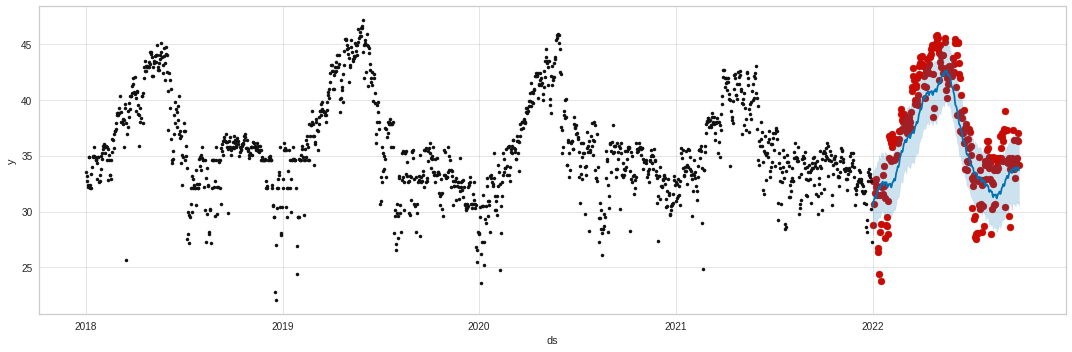

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(test.ds, test.y, color='r')
fig = model.plot(pjme_test_fcst, ax=ax)

In [ ]:
np.sqrt(mean_squared_error(y_true=test['y'],
                   y_pred=pjme_test_fcst['yhat']))

2.968095512514784

**Stats Forecast**

In [ ]:
!pip install statsforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 KB 3.7 MB/s eta 0:00:00


In [ ]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA,AutoETS,AutoCES,AutoTheta,MSTL,Holt,HoltWinters

In [ ]:
train

,ds,y
0,2018-01-01,33.5
1,2018-01-02,33.2
2,2018-01-03,32.7
3,2018-01-04,32.2
4,2018-01-05,32.4
...,...,...
1455,2021-12-27,33.1
1456,2021-12-28,33.4
1457,2021-12-29,32.7
1458,2021-12-30,30.2


In [ ]:
train['unique_id']=1
test['unique_id']=1

In [ ]:
season_length = 7 # Monthly data 
horizon = len(test) # Predict the lenght of the test df

# Include the models you imported
models = [
    AutoARIMA(season_length=season_length),
    AutoETS(season_length=season_length),
    MSTL(season_length=[7, 12], trend_forecaster=AutoARIMA()),
    AutoTheta(season_length=7),
    AutoCES(season_length=7),
    HoltWinters(season_length=7),
    Holt(season_length=7)
    


]
# Instansiate the StatsForecast class as sf
sf = StatsForecast(
    df=train,
    models=models,
    freq='D', 
    n_jobs=-1
)

# Forecast for the defined horizon
Y_hat_df = sf.forecast(horizon)

Y_hat_df

,ds,AutoARIMA,AutoETS,MSTL,AutoTheta,CES,HoltWinters,Holt
unique_id,,,,,,,,
1,2022-01-01,28.967611,28.51454,30.672817,28.516645,28.458244,28.643084,28.510210
1,2022-01-02,29.792734,28.51454,29.792288,28.462833,28.435602,28.508480,28.506662
1,2022-01-03,30.201000,28.51454,29.959076,28.598055,28.397264,28.545153,28.503113
1,2022-01-04,30.403006,28.51454,31.072145,28.673599,28.369629,28.607172,28.499565
1,2022-01-05,30.502958,28.51454,31.260624,28.563686,28.334799,28.352316,28.496017
...,...,...,...,...,...,...,...,...
1,2022-09-26,30.600849,28.51454,31.157471,28.401426,21.052202,28.368078,27.559271
1,2022-09-27,30.600849,28.51454,31.197996,28.476446,21.028522,28.465511,27.555721
1,2022-09-28,30.600849,28.51454,31.343060,28.367283,21.004869,28.238989,27.552174


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
eval={}
for i in Y_hat_df.columns[1:]:
  res=np.sqrt(mean_squared_error(Y_hat_df[i].values,test.y.values))
  eval[i]=res


In [ ]:
eval

{'AutoARIMA': 8.097045956873256,
 'AutoETS': 9.826237944207877,
 'MSTL': 7.892792675782413,
 'AutoTheta': 9.873226840615363,
 'CES': 13.543088768017856,
 'HoltWinters': 10.00546267185024,
 'Holt': 10.239850996584703}

In [ ]:
best_model = min(eval, key=eval.get)

In [ ]:
pred_df=Y_hat_df[['ds',best_model]]

In [ ]:
pred_df

,ds,MSTL
unique_id,,
1,2022-01-01,30.672817
1,2022-01-02,29.792288
1,2022-01-03,29.959076
1,2022-01-04,31.072145
1,2022-01-05,31.260624
...,...,...
1,2022-09-26,31.157471
1,2022-09-27,31.197996
1,2022-09-28,31.343060


In [ ]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 65.2 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.0
    Uninstalling matplotlib-3.7.0:
      Successfully uninstalled matplotlib-3.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.0.0rc9 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.


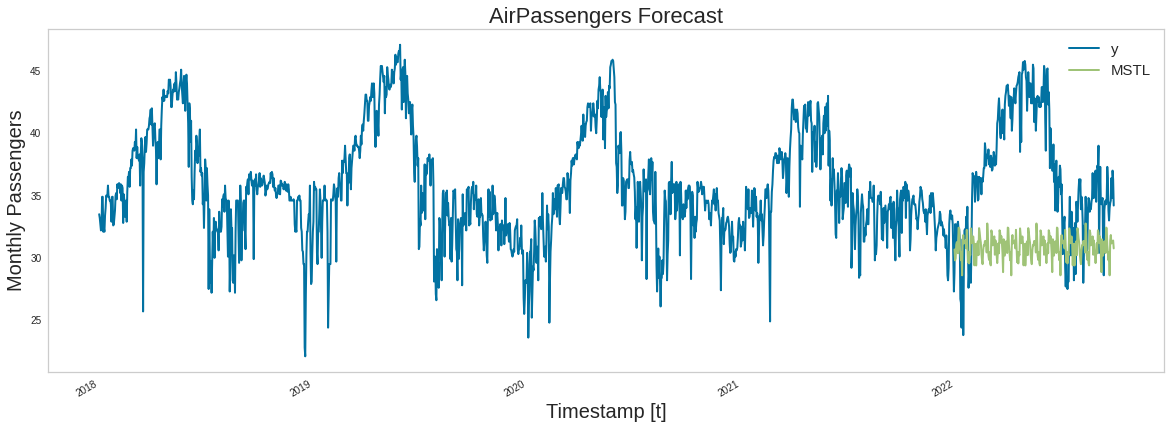

In [ ]:
plot_data= test.merge(pred_df, how='left', on=['ds'])


fig, ax = plt.subplots(1, 1, figsize = (20, 7))
plot_df = pd.concat([train, plot_data]).set_index('ds')
plot_df[['y',best_model ]].plot(ax=ax, linewidth=2)
ax.set_title('AirPassengers Forecast', fontsize=22)
ax.set_ylabel('Monthly Passengers', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

In [ ]:
AutoARIMA(season_length=season_length),
    AutoETS(season_length=season_length),
    MSTL(season_length=[7, 12], trend_forecaster=AutoARIMA()),
    AutoTheta(season_length=7),
    AutoCES(season_length=7),
    HoltWinters(season_length=7),
    Holt(season_length=7)
    

**Univariate Forecasting For Heat Wave**

In [1]:
!pip install statsforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 KB 6.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 KB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.8/187.8 KB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 KB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.2/234.2 KB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.7/140.7 KB 15.4 MB/s eta 0:00:00


In [2]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

In [7]:
class LSTM_Model:
  data=None
  timestep=None
  LSTM_Neurons=None
  scaler=None
  trained_model=None

  def __init__(self,LSTM_Neurons,timestep):
     self.LSTM_Neurons=LSTM_Neurons
     self.timestep=timestep
  
  #Loading the data from excel
  def load_data(self,data):
    self.data=np.array(data)

  def get_scaler(self):
    return self.scaler
    
  #Preprocessing and scaling the data
  def preprocess_data(self):
    self.scaler = MinMaxScaler()
    self.scaler = self.scaler.fit(self.data.reshape(-1, 1))
    scaled_data = self.scaler.transform(self.data.reshape(-1, 1))
    return scaled_data

  def create_data_and_labels(self):
    scaled_data=self.preprocess_data()
    X = []
    y = []
    for i in range(self.timestep, len(self.data)):
        X.append(scaled_data[i-self.timestep:i, 0])
        y.append(scaled_data[i, 0])
    X, y = np.array(X), np.array(y)
    return X,y

  def create_training_and_testing_data(self,size,X,y):
    # Split the data into training and testing sets
    split_idx = int(size * len(X))
    X_train, X_test = X, X[split_idx:]
    y_train, y_test = y, y[split_idx:]
    return X_train,y_train,X_test,y_test
    
  # Define the LSTM model architecture
  def create_LSTM_Model(self):
    model = Sequential()
    model.add(LSTM(self.LSTM_Neurons, input_shape=(self.timestep, 1),activation="tanh"))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

  def fit_data(self,model,X_train,y_train):
    model.fit(X_train, y_train, epochs=100, batch_size=32,verbose=False)
    return model

  def predict(self,model,X_test,y_test):
    y_pred = model.predict(X_test)
    y_pred = self.scaler.inverse_transform(y_pred)
    y_test = self.scaler.inverse_transform(y_test.reshape(1,-1))

    self.y_pred=y_pred
    self.y_test=y_test
    return y_pred,y_test

  def evaluate_rmse(self,model,y_pred,y_test):
    mse = np.mean((y_pred - y_test)**2)
    print("Mean squared error:", mse)

  def plot_test_and_predicted(self,y_pred,y_test):
    fig=plt.figure(figsize=(7,7))
    plt.plot([i[0] for i in y_pred],label='Predicted',color='orange')
    plt.plot(y_test[0],label="Actual",color='blue')
    plt.legend()
    plt.show()
  
  def getter(self):
    return self.y_pred,self.y_test

  def get_model(self):
    return self.trained_model

  def forecast_future(self,forecast_horizon):
    last_values = self.data[-self.timestep:]
    input_sequence = self.scaler.transform(last_values.reshape(-1, 1)).reshape(1, self.timestep)

    # Generate `num_predictions` future values using the model
    output=[]
    for i in range(forecast_horizon):
        # Predict the next value based on the previous `timesteps` values
        next_value = self.trained_model.predict(input_sequence,verbose=False)[0, 0]
        
        # Add the predicted value to the input sequence and remove the first value
        input_sequence = np.concatenate([input_sequence[:, 1:], [[next_value]]], axis=1)
        
        # Scale the input sequence for the next prediction
        input_sequence_scaled = self.scaler.inverse_transform(input_sequence.reshape(-1, 1)).reshape(1, self.timestep, 1)
        
        # Print the predicted value
        output.append(next_value)
    return self.scaler.inverse_transform(np.array(output).reshape(-1,1))
    
  def execute(self,size):
    X,y=self.create_data_and_labels()
    X_train,y_train,X_test,y_test=self.create_training_and_testing_data(size,X,y)
    model=self.create_LSTM_Model()
    fitted_model=self.fit_data(model,X_train,y_train)
    y_pred,y_test=self.predict(fitted_model,X_test,y_test)
    #self.plot_test_and_predicted(y_pred,y_test)
    #self.evaluate_rmse(fitted_model,y_pred,y_test)
    model=self.create_LSTM_Model()
    fitted_model=self.fit_data(model,X,y)
    self.trained_model=fitted_model

In [ ]:
!pip install statsforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 KB 5.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 KB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 KB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 KB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.8/187.8 KB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.9/224.9 KB 18.5 MB/s eta 0:00:00


In [22]:
import pandas as pd
import numpy as np
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA,AutoETS,AutoCES,AutoTheta,MSTL,Holt,HoltWinters
from prophet import Prophet
import datetime
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta

class TimeSeriesModelSelector:
    
    def __init__(self, data_file,target,ds,city,freq, train_size=0.85):
        self.data_file = data_file
        self.train_size = train_size
        self.target=target
        self.date=ds
        self.city=city
        self.freq=freq
        self.set_horizon()
        self.models = {'ARIMA': AutoARIMA(season_length=12), 'ETS': AutoETS(season_length=12), 'CES':AutoCES(season_length=12) ,'Theta': AutoTheta(season_length=12),'Holt':Holt(season_length=12),'HoltWinters':HoltWinters(season_length=12) ,'MSTL':MSTL(season_length=[12, 36], trend_forecaster=AutoARIMA()),'Prophet': Prophet,'LSTM':LSTM_Model(50,1)}
       
        
        
    def set_horizon(self):
            if self.freq=='M':
              self.horizon=12
            else:
              self.horizon=30

    def warm_start_params(self,m):
    
        res = {}
        for pname in ['k', 'm', 'sigma_obs']:
            if m.mcmc_samples == 0:
                res[pname] = m.params[pname][0][0]
            else:
                res[pname] = np.mean(m.params[pname])
        for pname in ['delta', 'beta']:
            if m.mcmc_samples == 0:
                res[pname] = m.params[pname][0]
            else:
                res[pname] = np.mean(m.params[pname], axis=0)
        return res   

    def load_data(self):
        self.data = pd.read_excel(self.data_file,self.city)
        self.data=self.data[[self.date,self.target]]
        self.train_data = self.data.iloc[:int(self.train_size * len(self.data))]
        self.test_data = self.data.iloc[int(self.train_size * len(self.data)):]
        self.prop=self.data.copy()
        self.prop.rename(columns={self.date:'ds',self.target:'y'},inplace=True)
        self.train_prop = self.prop.iloc[:int(self.train_size * len(self.prop))]
        self.test_prop = self.prop.iloc[int(self.train_size * len(self.prop)):]
    
    def fit_models(self):
        self.model_predictions = {}
        self.future_predictions={}
        for model_name, model_type in self.models.items():
            if model_name == 'ARIMA':
                #print(f"Fitting {model_name}")
                target=self.target
                model_fit = model_type.fit(y=self.train_data[target].values)
                predictions = model_fit.predict(h=len(self.test_data)+self.horizon)['mean']
                self.model_predictions[model_name] = predictions[:len(self.test_data)]
                future_val=predictions[len(self.test_data):]
                if self.freq=='D':
                  date_range=pd.date_range(start=self.test_data[self.date].tail(1).iloc[0,]+datetime.timedelta(days=1), periods=self.horizon,freq=self.freq)
                else:
                  date_range=pd.date_range(start=self.data[self.date].tail(1).iloc[0,]+relativedelta(months=1), periods=12,freq='MS')
                future_df = pd.DataFrame(list(zip(date_range, future_val)),columns =['Date', self.target+'_Predictions'])
                self.future_predictions[model_name]=future_df
                
                
            elif model_name == 'ETS':
                #print(f"Fitting {model_name}")
                target=self.target
                model_fit = model_type.fit(y=self.train_data[target].values)
                predictions = model_fit.predict(h=len(self.test_data)+self.horizon)['mean']
                self.model_predictions[model_name] = predictions[:len(self.test_data)]
                future_val=predictions[len(self.test_data):]
                if self.freq=='D':
                  date_range=pd.date_range(start=self.test_data[self.date].tail(1).iloc[0,]+datetime.timedelta(days=1), periods=self.horizon,freq=self.freq)
                else:
                  date_range=pd.date_range(start=self.data[self.date].tail(1).iloc[0,]+relativedelta(months=1), periods=12,freq='MS')
                future_df = pd.DataFrame(list(zip(date_range, future_val)),columns =['Date', self.target+'_Predictions'])
                self.future_predictions[model_name]=future_df
                   
            elif model_name == 'CES':
                #print(f"Fitting {model_name}")
                target=self.target
                model_fit = model_type.fit(y=self.train_data[target].values)
                predictions = model_fit.predict(h=len(self.test_data)+self.horizon)['mean']
                self.model_predictions[model_name] = predictions[:len(self.test_data)]
                future_val=predictions[len(self.test_data):]
                if self.freq=='D':
                  date_range=pd.date_range(start=self.test_data[self.date].tail(1).iloc[0,]+datetime.timedelta(days=1), periods=self.horizon,freq=self.freq)
                else:
                  date_range=pd.date_range(start=self.data[self.date].tail(1).iloc[0,]+relativedelta(months=1), periods=12,freq='MS')
                future_df = pd.DataFrame(list(zip(date_range, future_val)),columns =['Date', self.target+'_Predictions'])
                self.future_predictions[model_name]=future_df
                
            elif model_name == 'Theta':
                #print(f"Fitting {model_name}")
                target=self.target
                model_fit = model_type.fit(y=self.train_data[target].values)
                predictions = model_fit.predict(h=len(self.test_data)+self.horizon)['mean']
                self.model_predictions[model_name] = predictions[:len(self.test_data)]
                future_val=predictions[len(self.test_data):]
                if self.freq=='D':
                  date_range=pd.date_range(start=self.test_data[self.date].tail(1).iloc[0,]+datetime.timedelta(days=1), periods=self.horizon,freq=self.freq)
                else:
                  date_range=pd.date_range(start=self.data[self.date].tail(1).iloc[0,]+relativedelta(months=1), periods=12,freq='MS')
                future_df = pd.DataFrame(list(zip(date_range, future_val)),columns =['Date', self.target+'_Predictions'])
                self.future_predictions[model_name]=future_df

            elif model_name == 'Holt':
                #print(f"Fitting {model_name}")
                target=self.target
                model_fit = model_type.fit(y=self.train_data[target].values)
                predictions = model_fit.predict(h=len(self.test_data)+self.horizon)['mean']
                self.model_predictions[model_name] = predictions[:len(self.test_data)]
                future_val=predictions[len(self.test_data):]
                if self.freq=='D':
                  date_range=pd.date_range(start=self.test_data[self.date].tail(1).iloc[0,]+datetime.timedelta(days=1), periods=self.horizon,freq=self.freq)
                else:
                  date_range=pd.date_range(start=self.data[self.date].tail(1).iloc[0,]+relativedelta(months=1), periods=12,freq='MS')
                future_df = pd.DataFrame(list(zip(date_range, future_val)),columns =['Date', self.target+'_Predictions'])
                self.future_predictions[model_name]=future_df

            elif model_name == 'HoltWinters':
                #print(f"Fitting {model_name}")
                target=self.target
                model_fit = model_type.fit(y=self.train_data[target].values)
                predictions = model_fit.predict(h=len(self.test_data)+self.horizon)['mean']
                self.model_predictions[model_name] = predictions[:len(self.test_data)]
                future_val=predictions[len(self.test_data):]
                if self.freq=='D':
                  date_range=pd.date_range(start=self.test_data[self.date].tail(1).iloc[0,]+datetime.timedelta(days=1), periods=self.horizon,freq=self.freq)
                else:
                  date_range=pd.date_range(start=self.data[self.date].tail(1).iloc[0,]+relativedelta(months=1), periods=12,freq='MS')
                future_df = pd.DataFrame(list(zip(date_range, future_val)),columns =['Date', self.target+'_Predictions'])
                self.future_predictions[model_name]=future_df

            elif model_name == 'MSTL':
                #print(f"Fitting {model_name}")
                target=self.target
                model_fit = model_type.fit(y=self.train_data[target].values)
                predictions = model_fit.predict(h=len(self.test_data)+self.horizon)['mean']
                self.model_predictions[model_name] = predictions[:len(self.test_data)]
                future_val=predictions[len(self.test_data):]
                if self.freq=='D':
                  date_range=pd.date_range(start=self.test_data[self.date].tail(1).iloc[0,]+datetime.timedelta(days=1), periods=self.horizon,freq=self.freq)
                else:
                  date_range=pd.date_range(start=self.data[self.date].tail(1).iloc[0,]+relativedelta(months=1), periods=12,freq='MS')
                future_df = pd.DataFrame(list(zip(date_range, future_val)),columns =['Date', self.target+'_Predictions'])
                self.future_predictions[model_name]=future_df

            elif model_name == 'Prophet':
                #print(f"Fitting {model_name}")
                model = model_type(changepoint_prior_scale=0.001,
                                    seasonality_prior_scale=0.01,
                                    daily_seasonality=True,
                                    weekly_seasonality=True,
                                    yearly_seasonality=True)
                

                model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
                model.fit(self.train_prop)
                predictions = model.predict(self.test_prop)
                self.model_predictions[model_name] = predictions['yhat'].values
                m2 = Prophet(changepoint_prior_scale=0.001,
                                    seasonality_prior_scale=0.01,
                                    daily_seasonality=True,
                                    weekly_seasonality=True,
                                    yearly_seasonality=True).add_seasonality(name='monthly', period=30.5, fourier_order=5)
                m2.fit(self.prop, init=self.warm_start_params(model))
                future_dates = m2.make_future_dataframe(periods=self.horizon, freq='MS')
                future_pred=m2.predict(future_dates)
                future_pred=future_pred.tail(self.horizon)[['ds','yhat']].rename(columns={'ds':'Date','yhat':self.target+'_Predictions'})
                self.future_predictions[model_name]=future_pred
              
            elif model_name=='LSTM':
                #print("Fitting LSTM")
                model_type.load_data(self.data[self.target].values)
                model_type.execute(self.train_size)
                self.model_predictions[model_name]=model_type.getter()[0]
                if self.freq=='D':
                  date_range=pd.date_range(start=self.test_data[self.date].tail(1).iloc[0,]+datetime.timedelta(days=1), periods=self.horizon,freq=self.freq)
                else:
                  date_range=pd.date_range(start=self.data[self.date].tail(1).iloc[0,]+relativedelta(months=1), periods=12,freq='MS')
                future_val=model_type.forecast_future(self.horizon)
                future_val=future_val.reshape(1,self.horizon).tolist()[0]
                future_df = pd.DataFrame(list(zip(date_range, future_val)),columns =['Date', self.target+'_Predictions'])
                self.future_predictions[model_name]=future_df


                
    
    def evaluate_models(self):
        self.model_rmse = {}
        for model_name, predictions in self.model_predictions.items():
            rmse = np.sqrt(np.mean((predictions - self.test_data[self.target].values)**2))
            self.model_rmse[model_name] = rmse
        self.best_model = min(self.model_rmse, key=self.model_rmse.get)
        self.best_rmse = self.model_rmse[self.best_model]
    
    def run(self):
        self.load_data()
        self.fit_models()
        self.evaluate_models()
        print("RMSE for different Models")
        print(pd.DataFrame.from_dict(self.model_rmse))
        
        print(f"The best model for this time series data is {self.best_model} with RMSE of {self.best_rmse}")
        res=self.future_predictions[self.best_model]
        res[self.target+'_Predictions']=np.round(res[self.target+'_Predictions'])
        return res


**City Wise Temperature Prediction**

In [23]:
def get_citywise_temperature():
  city_list=['Adilabad','Warangal','Karimnagar','Khammam','Nizamabad']
  temperature_predictions={}
  for i in city_list:
    print(f"-----------Training Temperature forecasting Model for {i}-----------")
    ts=TimeSeriesModelSelector('/content/Heat Wave Dataset Cleaned.xlsx','Max Temp (°C)','Date',i,'D')
    val=ts.run()
    temperature_predictions[i]=val
    print("\n")
  return temperature_predictions

models=[]
def get_citywise_aqi():
  city_list=['Adilabad','Warangal','Karimnagar','Khammam','Nizamabad']
  aqi_predictions={}
  for i in city_list:
    
    print(f"-----------Training AQI forecasting Model for {i}-----------")
    ts=TimeSeriesModelSelector('/content/AAQ-AQI-interpolated.xlsx','AQI','DATE',i,'M')
    val=ts.run()
    aqi_predictions[i]=val
    models.append(ts)
    print("\n")
  return aqi_predictions



In [24]:
aqi=get_citywise_aqi()

-----------Training AQI forecasting Model for Adilabad-----------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpf7z7az_f/c4l9i6tf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf7z7az_f/6pc_muxu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1390', 'data', 'file=/tmp/tmpf7z7az_f/c4l9i6tf.json', 'init=/tmp/tmpf7z7az_f/6pc_muxu.json', 'output', 'file=/tmp/tmpf7z7az_f/prophet_model1ll7bdjt/prophet_model-20230303171321.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:13:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:13:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf7z7az_f/0uokdyeb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf7z7az_f/gmyi8dri.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

1/1 [==============================] - 1s 558ms/step
RMSE for different Models


ValueError: ignored

In [16]:
temp=get_citywise_temperature()

-----------Training Temperature forecasting Model for Adilabad-----------
Fitting ARIMA
Fitting ETS
Fitting CES
Fitting Theta
Fitting Holt
Fitting HoltWinters
Fitting MSTL


DEBUG:cmdstanpy:input tempfile: /tmp/tmpf7z7az_f/etzw8rb0.json


Fitting Prophet


DEBUG:cmdstanpy:input tempfile: /tmp/tmpf7z7az_f/8opbjayf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41280', 'data', 'file=/tmp/tmpf7z7az_f/etzw8rb0.json', 'init=/tmp/tmpf7z7az_f/8opbjayf.json', 'output', 'file=/tmp/tmpf7z7az_f/prophet_modelk10ylibs/prophet_model-20230303163421.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:34:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:34:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf7z7az_f/yzloflwx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf7z7az_f/lltvwfbw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin

Fitting LSTM
9/9 [==============================] - 1s 3ms/step
The best model for this time series data is Prophet with RMSE of 2.9447418365813527


-----------Training Temperature forecasting Model for Warangal-----------
Fitting ARIMA
Fitting ETS
Fitting CES
Fitting Theta
Fitting Holt
Fitting HoltWinters
Fitting MSTL


DEBUG:cmdstanpy:input tempfile: /tmp/tmpf7z7az_f/6uyfbbuk.json


Fitting Prophet


DEBUG:cmdstanpy:input tempfile: /tmp/tmpf7z7az_f/g5v_dzyd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3904', 'data', 'file=/tmp/tmpf7z7az_f/6uyfbbuk.json', 'init=/tmp/tmpf7z7az_f/g5v_dzyd.json', 'output', 'file=/tmp/tmpf7z7az_f/prophet_modeltuj8rhi8/prophet_model-20230303163650.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:36:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:36:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf7z7az_f/ugfn6jlk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf7z7az_f/jurbkytk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin'

Fitting LSTM
9/9 [==============================] - 1s 3ms/step
The best model for this time series data is Prophet with RMSE of 2.6939086208788807


-----------Training Temperature forecasting Model for Karimnagar-----------
Fitting ARIMA
Fitting ETS
Fitting CES
Fitting Theta
Fitting Holt
Fitting HoltWinters
Fitting MSTL


DEBUG:cmdstanpy:input tempfile: /tmp/tmpf7z7az_f/s2loodfj.json


Fitting Prophet


DEBUG:cmdstanpy:input tempfile: /tmp/tmpf7z7az_f/w9evrn7g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39762', 'data', 'file=/tmp/tmpf7z7az_f/s2loodfj.json', 'init=/tmp/tmpf7z7az_f/w9evrn7g.json', 'output', 'file=/tmp/tmpf7z7az_f/prophet_modelu13hn6wv/prophet_model-20230303163857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:38:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:38:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf7z7az_f/5f_wa0dv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf7z7az_f/lc2mo054.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin

Fitting LSTM
9/9 [==============================] - 1s 3ms/step
The best model for this time series data is Prophet with RMSE of 3.0565823046421023


-----------Training Temperature forecasting Model for Khammam-----------
Fitting ARIMA
Fitting ETS
Fitting CES
Fitting Theta
Fitting Holt
Fitting HoltWinters
Fitting MSTL


DEBUG:cmdstanpy:input tempfile: /tmp/tmpf7z7az_f/vswihcv_.json


Fitting Prophet


DEBUG:cmdstanpy:input tempfile: /tmp/tmpf7z7az_f/80gea20h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74788', 'data', 'file=/tmp/tmpf7z7az_f/vswihcv_.json', 'init=/tmp/tmpf7z7az_f/80gea20h.json', 'output', 'file=/tmp/tmpf7z7az_f/prophet_modelh107r9x8/prophet_model-20230303164117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:41:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:41:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf7z7az_f/5tuoo08z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf7z7az_f/wiimr1ae.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin

Fitting LSTM
9/9 [==============================] - 1s 3ms/step
The best model for this time series data is Prophet with RMSE of 2.3866855600374244


-----------Training Temperature forecasting Model for Nizamabad-----------
Fitting ARIMA
Fitting ETS
Fitting CES
Fitting Theta
Fitting Holt
Fitting HoltWinters
Fitting MSTL


DEBUG:cmdstanpy:input tempfile: /tmp/tmpf7z7az_f/snt60mvo.json


Fitting Prophet


DEBUG:cmdstanpy:input tempfile: /tmp/tmpf7z7az_f/d49ohgow.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63472', 'data', 'file=/tmp/tmpf7z7az_f/snt60mvo.json', 'init=/tmp/tmpf7z7az_f/d49ohgow.json', 'output', 'file=/tmp/tmpf7z7az_f/prophet_modelaa74av21/prophet_model-20230303164402.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:44:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:44:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf7z7az_f/b6ofklk3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf7z7az_f/q7sb_gz_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin

Fitting LSTM
9/9 [==============================] - 1s 5ms/step
The best model for this time series data is Prophet with RMSE of 2.993165793177583




In [13]:
city_list=['Adilabad','Warangal','Karimnagar','Khammam','Nizamabad']

In [ ]:
for i,j in zip(models,city_list):
  y_pred=i.model_predictions[i.best_model]
  y_test=i.test_data[i.target].values
  date_range=pd.date_range(start=i.train_data[i.date].tail(1).iloc[0,]+relativedelta(months=1), periods=len(i.test_data),freq='MS')
  test_df = pd.DataFrame(list(zip(date_range,y_pred, y_test)),columns =['Date','y_pred', 'y_test'])
  future_pred=i.future_predictions[i.best_model]
  with pd.ExcelWriter('/content/Evaluation.xlsx',mode='a') as writer:
    test_df.to_excel(writer, sheet_name=f"{j}_Test",index=False,header=True)
    future_pred.to_excel(writer, sheet_name=f"{j}_Future_pred",index=False,header=True)
